# Espaço para análise exploratória de dados com suporte de IA

Vamos descrever as bases de dados que incorporamos na disciplina, juntamente com exemplos de carregamento dos dados no pacote estatístico R.

Para fazer as análises com o suporte da IA, faça perguntas neste notebook sempre indicando que você quer um código na linguagem R. Caso queira gráficos, indique sempre no prompt para que seja usada a biblioteca ggplot.

Primeiro passo: rodar as duas células abaixo para configurar as variáveis de ambiente e carregar as bibliotecas necessárias.

In [1]:
# Exemplo de caminho: pode ser uma pasta dentro do seu diretório home
# Lembre-se que o R pode adicionar subdiretórios específicos da versão/arquitetura
meu_caminho_biblioteca <- "~/R/library"

# Define a variável de ambiente R_LIBS_USER para a sessão atual
Sys.setenv(R_LIBS_USER = meu_caminho_biblioteca)

# Verifica o valor da variável de ambiente
Sys.getenv("R_LIBS_USER")

# Mostra todos os caminhos de biblioteca que o R está usando
# O seu novo caminho deve aparecer aqui, geralmente como o primeiro da lista.
.libPaths()

[1] "~/R/library"

[1] "/usr/local/lib/R/site-library" "/usr/local/lib/R/library"     
[3] "/home/vscode/R/library"

In [2]:

################################################################################
#               INSTALAÇÃO E CARREGAMENTO DE PACOTES NECESSÁRIOS               #
################################################################################

# Pacotes utilizados
pacotes <- c("tidyverse", #carregar outros pacotes do R
             "knitr", "kableExtra","IRdisplay") #formatação de tabelas

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T, lib = meu_caminho_biblioteca)
    break()}
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
} else {
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: knitr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘knitr’”
Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: IRdisplay

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical

tidyverse      knitr kableExtra  IRdisplay 
      TRUE      FALSE       TRUE      FALSE

In [15]:
load("Trabalho/bases-de-dados/acidentes/datatran2024.RData")
# df_acidentes_prf é o nome do data frame carregado
load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata")
# df_pavimento_unificado é o nome do data frame carregado
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")
# df_snv é o nome do data frame carregado
load("Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData")
# df_trafego é o nome do data frame carregado
ls()

[1] "df_acidentes_prf"       "df_pavimento_unificado" "df_snv"                
[4] "df_trafego"

In [13]:
# Para limpar a memória da sessão R removendo todos os objetos do ambiente global, 
# execute rm(list = ls(all.names = TRUE)). 
# Em seguida, rode gc() para forçar a coleta de lixo e liberar a memória fisicamente alocada.​
rm(list = ls(all.names = TRUE))
gc()
ls()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2952729,157.7,4602281,245.8,4602281,245.8
Vcells,5121782,39.1,17824054,136.0,14527131,110.9


character(0)

# Nomes dos data frames R

load("Trabalho/bases-de-dados/acidentes/datatran2024.RData")
# df_acidentes_prf é o nome do data frame carregado
load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata")
# df_pavimento_unificado é o nome do data frame carregado
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")
# df_snv é o nome do data frame carregado
load("Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData")

## Base de dados de contagem de tráfego

In [8]:
# Mostrar as 20 primeiras linhas de contagem-de-trafego
# Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData
################################################################################
#    CARREGAR E EXIBIR PRIMEIRAS 20 LINHAS COM FORMATAÇÃO MELHORADA            #
################################################################################

# Carregar bibliotecas necessárias
library(IRdisplay)
# Carregar o arquivo RData
load("Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData")

# A tabela formatada
tb <- df_trafego %>%
  head(20) %>%
  kable(caption = "Dataset de Contagem de Tráfego - Primeiras 20 linhas") %>%
  kable_styling(
    bootstrap_options = c("striped", "hover", "condensed"),
    full_width = FALSE,
    font_size = 11,
    fixed_thead = list(enabled = TRUE, background = "lightgray")
  ) %>%
  scroll_box(width = "100%", height = "500px")

IRdisplay::display_html(as.character(tb))

ID,vl_codigo,UF,REGIAO,RELEVO_PRE,VELOCIDADE,CODIGO_BR,EXTENSAO,SUPERFICIE,JURISDICAO,TIPO_LINK,CLASSIFICACAO,GEH,VMDA_C,VMDA_D,VMDA_TOTAL,CODIGO_SNV.SRE,Ano
4317,307BAC0005,AC,NA,NA,NA,307,804,PLA,FEDERAL-PLA,Eixo Principal,Planejada,NA,NA,NA,NA,NA,2020
4318,307BAC0010,AC,NA,NA,NA,307,356,PLA,FEDERAL-PLA,Eixo Principal,Planejada,NA,NA,NA,NA,NA,2020
4319,307BAC0015,AC,NA,NA,NA,307,57,PLA,FEDERAL-PLA,Eixo Principal,Planejada,NA,NA,NA,NA,NA,2020
4320,307BAC0018,AC,NA,NA,NA,307,95,PLA,FEDERAL-PLA,Eixo Principal,Planejada,NA,NA,NA,NA,NA,2020
4321,307BAC0020,AC,NA,NA,NA,307,254,PLA,NA,Eixo Principal,Não Simulável,NA,NA,NA,NA,NA,2020
4322,307BAC0022,AC,NA,NA,NA,307,224,PAV,FEDERAL-PAV,Eixo Principal,NA,NA,833,871,1704,NA,2020
4323,307BAC0025,AC,NA,NA,NA,307,105,PAV,FEDERAL-PAV,Eixo Principal,NA,NA,1097,1124,2221,NA,2020
4324,307BAC0028,AC,NA,NA,NA,307,7,PAV,FEDERAL-PAV,Eixo Principal,NA,NA,1097,1124,2221,NA,2020
4325,307BAC0030,AC,NA,NA,NA,307,22,PLA,NA,Eixo Principal,NA,NA,1097,1124,2221,NA,2020
4326,307BAC0035,AC,NA,NA,NA,307,13,PLA,NA,Eixo Principal,Não Simulável,NA,NA,NA,NA,NA,2020


# Dicionário de Dados - Contagem de Tráfego

## Visão Geral
Dataset unificado de contagem de tráfego rodoviário federal brasileiro, consolidando dados de dois anos (2020, 2021) provenientes de diferentes fontes: SNV 202001A (2020), PNCT (2021).

**Dimensões:** ~65.000+ registros × 18 colunas  
**Período:** Dezembro 2020 a Dezembro 2021  
**Fonte primária:** DNIT - Departamento Nacional de Infraestrutura de Transportes

---

## Estrutura de Colunas

| # | Campo | Tipo | Descrição | Valores Exemplo | Observações |
|---|-------|------|-----------|-----------------|-------------|
| 1 | **ID** | Inteiro | Chave Primária - Identificador único do trecho na base georreferenciada | 4317, 4318, 4536 | Único por trecho; pode haver quebras no SNV original |
| 2 | **vl_codigo** | Texto | Código alfanumérico de identificação do trecho rodoviário | 307BAC0005, 317BAC0175 | Formato: [BR][SIGLA_UF][SEQUÊNCIA] ex: 307=BR-307, AC=Acre |
| 3 | **UF** | Texto (2 chars) | Sigla da Unidade da Federação | AC, RS, SP, MG | Identifica estado onde o trecho está localizado |
| 4 | **REGIAO** | Texto | Região geográfica do Brasil (PNCT 2021) | Sul, Nordeste, Sudeste, Centro-Oeste, Norte | **NA em 2020 e 2022** (dados SNV não especificam região) |
| 5 | **RELEVO_PRE** | Texto | Categorização do relevo predominante do trecho | Plano, Ondulado, Montanhoso | **NA em 2020 e 2022** (disponível apenas PNCT 2021) |
| 6 | **VELOCIDADE** | Numérico (km/h) | Velocidade de fluxo livre estimada | 70, 80, 100 | **NA em 2020 e 2022** (disponível apenas PNCT 2021) |
| 7 | **CODIGO_BR** | Numérico | Identificação numérica da rodovia federal | 101, 116, 307, 317, 392 | Ex: BR-101, BR-116, BR-307 |
| 8 | **EXTENSAO** | Numérico (km) | Comprimento/extensão do trecho rodoviário | 7, 57, 224, 804 | Medida em quilômetros; pode variar conforme quebras SNV |
| 9 | **SUPERFICIE** | Texto | Tipo de superfície da rodovia | PAV (Pavimentada), PLA (Planejada), DUP (Duplicada), IMP (Implantada) | Classifica estado/tipo da via |
| 10 | **JURISDICAO** | Texto | Jurisdição administrativa do trecho | FEDERAL-PAV, FEDERAL-PLA, Estadual, Concessão Federal | Define responsabilidade de manutenção |
| 11 | **TIPO_LINK** | Texto | Caracterização funcional do segmento | Eixo Principal, Rodovia, Travessia, Conector | Classifica papel na malha rodoviária |
| 12 | **CLASSIFICACAO** | Texto | Classificação de representatividade e simulabilidade | Referencial, Não Simulável, Não Pavimentada, Travessia - Não Simulável, Planejada | **Referencial**: link utilizado como Count Location; **Não Simulável**: próximo a áreas urbanas (uso restrito); **Planejada**: link em planejamento |
| 13 | **GEH** | Texto | Classificação conforme índice GEH (Geoffrey E. Havers) | A, B, C, ... | Mede qualidade do ajuste estatístico em links referenciais; **NA** em links não simuláveis ou planejados |
| 14 | **VMDA_C** | Numérico (veículos/dia) | Volume Médio Diário Anualizado - Sentido Crescente (2020/2022) ou AB (2021) | 370, 833, 1097 | Fluxo médio estimado de veículos por dia (sentido principal); **NA** em trechos sem contagem |
| 15 | **VMDA_D** | Numérico (veículos/dia) | Volume Médio Diário Anualizado - Sentido Decrescente (2020/2022) ou BA (2021) | 379, 871, 1124 | Fluxo médio estimado de veículos por dia (sentido inverso); **NA** em trechos sem contagem |
| 16 | **VMDA_TOTAL** | Numérico (veículos/dia) | Volume Médio Diário Anualizado - Total (ambos sentidos) | 749, 1704, 2221 | **Fórmula:** VMDA_C + VMDA_D; representa tráfego bidirecional |
| 17 | **CODIGO_SNV.SRE** | Texto | Código do Sistema Nacional de Viação (SNV) ou Sistema Rodoviário Estadual (SRE) | 116BRS3150, 101BRS4480 | **NA em 2020** (informação não disponível); identifica segmento na rede estadual/federal |
| 18 | **Ano** | Inteiro (4 digits) | Ano de referência da contagem/estimativa | 2020, 2021 | Permite análise temporal; dados de 2020 e 2021 referem-se a dezembro |

---

## Categorias de Valores Chave

### SUPERFICIE
- **PAV** = Pavimentada (asfalto/concreto)
- **PLA** = Planejada (em projeto)
- **DUP** = Duplicada (dois sentidos separados)
- **IMP** = Implantada (base/leito)
- **LN** = Leito Natural

### CLASSIFICACAO
- **Referencial**: Links utilizados como locais de contagem (Count Location); recomendado para análises
- **Não Simulável**: Próximos a grandes áreas urbanas; uso restrito (usar com cautela)
- **Não Pavimentada**: Trechos sem pavimentação
- **Travessia - Não Simulável**: Trechos de travessia urbana
- **Planejada**: Rodovias ainda em planejamento; sem dados de contagem

### GEH (Geoffrey E. Havers)
Mede qualidade estatística:
- **A**: Excelente ajuste (GEH < 5)
- **B**: Bom ajuste (5 ≤ GEH < 10)
- **C**: Ajuste aceitável (GEH ≥ 10)

---

## Padrões de Dados Ausentes (NA)

| Campo | 2020 | 2021 | 2022 | Motivo |
|-------|------|------|------|--------|
| REGIAO | Sempre | Presente | Sempre | Dados SNV não especificam região geográfica |
| RELEVO_PRE | Sempre | Presente | Sempre | Campo exclusivo PNCT 2021 |
| VELOCIDADE | Sempre | Presente | Sempre | Campo exclusivo PNCT 2021 |
| CODIGO_SNV.SRE | Sempre | Presente | Presente | Informação não coletada em 2020 |
| VMDA_C, VMDA_D, VMDA_TOTAL | Frequente | Raro | Frequente | Trechos "Planejados" ou "Não Simuláveis" sem contagem |
| GEH | Frequente | Raro | Frequente | Preenchido apenas em links Referenciais |

---

## Relacionamentos e Chaves

**Chave Primária Composta:** `(ID, Ano)` — identifica univocamente um trecho em um ano específico

**Chave Estrangeira Implícita:**
- `CODIGO_BR` → Rodovia Federal
- `UF` → Unidade da Federação
- `CODIGO_SNV.SRE` → Sistema de classificação rodoviária

---

## Qualidade de Dados

### Completude por Fonte
| Aspecto | 2020 (SNV) | 2021 (PNCT) | 
|---------|-----------|-----------|
| Cobertura geográfica | 27 UFs | 27 UFs | 
| Taxa de preenchimento VMDA | ~60% | ~85% |
| Dados GEH | ~40% (links referenciais) | ~80% |


---

## Casos de Uso

✅ **Recomendados:**
- Análise de tráfego em rodovias federais pavimentadas (classificação = "Referencial")
- Série temporal 2020-2022 com filtro `CLASSIFICACAO != "Planejada"`
- Comparação regional (use filtro PNCT 2021 separadamente ou exclua REGIAO NA)

⚠️ **Usar com Cautela:**
- Trechos "Não Simulável" (viés para áreas urbanas)
- Análises que exigem VELOCIDADE, RELEVO_PRE (disponível apenas 2021)

❌ **Não Recomendados:**
- Rodovias planejadas (sem dados de tráfego)
- Estimativas para trechos com VMDA = NA

---

## Exemplo de Filtro SQL Recomendado

```sql
SELECT * FROM contagem_trafego
WHERE Ano = 2021
  AND CLASSIFICACAO IN ('Referencial', 'Referencial - Planejada')
  AND VMDA_TOTAL IS NOT NULL
  AND VMDA_TOTAL > 0
ORDER BY VMDA_TOTAL DESC
```

---

 
**Fonte:** DNIT / Serviços de Dados Abertos  
**Responsável:** Analista de Dados - Setor de Planejamento Rodoviário

## Base de dados de pavimentos (condições e definições)

### Dicionário de dados de condições de pavimento



In [9]:
# Ler base Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata

# Carregar o arquivo (verbose=TRUE lista os objetos)
objects <- load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata", verbose=TRUE)

# Assumindo um objeto principal (ajuste se múltiplos)
df_condicoes_pavimento <- get(objects[1])  # ou objects[[1]]

# Ver estrutura e primeiras 20 linhas
str(df_condicoes_pavimento)
head(df_condicoes_pavimento, 20)

Loading objects:
  df_pavimento_unificado
'data.frame':	75985 obs. of  14 variables:
 $ Contrato   : chr  "01 00583/2018" "01 00583/2018" "01 00583/2018" "01 00583/2018" ...
 $ UF         : chr  "AM" "AM" "AM" "AM" ...
 $ Rodovia    : chr  "BR-230" "BR-230" "BR-230" "BR-230" ...
 $ km.inicial : num  213 212 211 210 209 ...
 $ km.final   : num  212 211 210 209 208 214 215 198 199 200 ...
 $ Extensao.km: num  1.2 1 1 1 1 0.8 1 0.3 1 1 ...
 $ Data       : Date, format: "2020-11-30" "2020-11-30" ...
 $ Latitude   : num  -7.2 -7.19 -7.19 -7.19 -7.19 ...
 $ Longitude  : num  -59.9 -59.9 -59.9 -59.9 -59.9 ...
 $ ICC        : num  80 80 80 80 80 85 85 37.5 30 25 ...
 $ ICP        : num  70 70 45 70 45 70 70 32.5 25 25 ...
 $ ICM        : num  73 73 55.5 73 55.5 74.5 74.5 34 26.5 25 ...
 $ Ano        : num  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ Observação : chr  NA NA NA NA ...


,Contrato,UF,Rodovia,km.inicial,km.final,Extensao.km,Data,Latitude,Longitude,ICC,ICP,ICM,Ano,Observação
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,01 00583/2018,AM,BR-230,213.2,212,1.2,2020-11-30,-7.199136,-59.89099,80.0,70.0,73.00,2020,NA
2,01 00583/2018,AM,BR-230,212.0,211,1.0,2020-11-30,-7.194955,-59.88551,80.0,70.0,73.00,2020,NA
3,01 00583/2018,AM,BR-230,211.0,210,1.0,2020-11-30,-7.194955,-59.88551,80.0,45.0,55.50,2020,NA
4,01 00583/2018,AM,BR-230,210.0,209,1.0,2020-11-30,-7.194955,-59.88551,80.0,70.0,73.00,2020,NA
5,01 00583/2018,AM,BR-230,209.0,208,1.0,2020-11-30,-7.194955,-59.88551,80.0,45.0,55.50,2020,NA
6,01 00583/2018,AM,BR-230,213.2,214,0.8,2020-11-30,-7.178838,-59.84656,85.0,70.0,74.50,2020,NA
7,01 00583/2018,AM,BR-230,214.0,215,1.0,2020-11-30,-7.192325,-59.88332,85.0,70.0,74.50,2020,NA
8,09 00346/2018,PR,BR-476,197.7,198,0.3,2020-11-05,-25.765624,-49.73908,37.5,32.5,34.00,2020,NA
9,09 00346/2018,PR,BR-476,198.0,199,1.0,2020-11-05,-25.760412,-49.73790,30.0,25.0,26.50,2020,NA


# Dicionário de Dados – Condições de Pavimento das Rodovias Brasileiras

## Visão Geral
Dataset contendo avaliações de índices de condição de pavimento em rodovias federais brasileiras, com registros segmentados por quilometragem e data de inspeção. Cada linha representa um segmento de rodovia avaliado com indicadores estruturais e funcionais.

**Dimensões:** ~10.000+ registros × 14 colunas  
**Período:** Novembro 2020 – 2021  
**Fonte:** DNIT – Departamento Nacional de Infraestrutura de Transportes (SNV)

---

## Definição dos Campos

| # | Campo | Tipo | Formato | Descrição | Exemplo | Observações |
|---|-------|------|---------|-----------|---------|-------------|
| 1 | **Contrato** | Caractere | `NN NNNNN/AAAA` | Número do contrato de serviço de manutenção/inspeção | `01 00583/2018`, `09 00346/2018` | Identifica entidade responsável pela avaliação e manutenção |
| 2 | **UF** | Caractere | `XX` | Sigla da Unidade Federativa (estado) | `AM`, `PR`, `RS` | Formato ISO 3166-2 BR; localiza geograficamente o segmento |
| 3 | **Rodovia** | Caractere | `XX-NNN` | Designação da rodovia federal | `BR-230`, `BR-476`, `BR-290` | Formato padrão DNIT; identifica a via |
| 4 | **km.inicial** | Numérico (decimal) | `NNN,N` | Quilometragem inicial do segmento avaliado | `213.2`, `197.7` | Ponto de início da inspeção; precisão até 0,1 km |
| 5 | **km.final** | Numérico (decimal) | `NNN,N` | Quilometragem final do segmento avaliado | `212.0`, `198.0` | Ponto final da inspeção; deve ser ≤ km.inicial para via bidirecional |
| 6 | **Extensao.km** | Numérico (decimal) | `N,NN` | Extensão do segmento em quilômetros | `1.0`, `0.3`, `1.2` | Calculado como diferença entre km.final e km.inicial; segmentos típicos 0,3–1,5 km |
| 7 | **Data** | Data | `AAAA-MM-DD` | Data da inspeção mais recente | `2020-11-30`, `2020-11-05` | Formato ISO 8601; define quando foram coletados os índices |
| 8 | **Latitude** | Numérico (decimal) | `±NN,NNNNNN` | Coordenada geográfica de latitude (datum WGS84) | `-7.199136`, `-25.765624` | Graus decimais; negativo = hemisfério Sul; precisão até 6 casas decimais |
| 9 | **Longitude** | Numérico (decimal) | `±NN,NNNNN` | Coordenada geográfica de longitude (datum WGS84) | `-59.89099`, `-49.73908` | Graus decimais; negativo = hemisfério Oeste (Brasil); precisão até 5-6 casas decimais |
| 10 | **ICC** | Numérico (decimal) | `NN,N` | **Índice de Condição da Conservação** (manutenção estrutural) | `80.0`, `25.0`, `62.5` | Escala 0–100; maior valor = melhor condição estrutural |
| 11 | **ICP** | Numérico (decimal) | `NN,N` | **Índice de Condição do Pavimento** (desgaste superficial) | `70.0`, `45.0`, `47.5` | Escala 0–100; maior valor = melhor condição superficial |
| 12 | **ICM** | Numérico (decimal) | `NN,NN` | **Índice de Condição de Manutenção** (composição ponderada) | `73.00`, `55.50`, `34.00` | Fórmula: IP x 0,70 + IC x 0,30; determina classificação final(*) |
| 13 | **Ano** | Inteiro | `AAAA` | Ano de extração da data de inspeção | `2020` | Derivado da coluna **Data**; facilita particionamento e análise temporal |
| 14 | **Observação** | Caractere | `TEXTO` | Campo de anotações adicionais sobre a avaliação | `NA` | Geralmente vazio (NA); pode conter notas sobre condições especiais ou limitações da inspeção |

---


## Matriz de Classificação de ICM (*)
(origem https://www.gov.br/dnit/pt-br/central-de-conteudos/atos-normativos/tipo/resolucoes/resolucao-5-2022-dir-ba-080-de-29-04-2022.pdf)

ICM= IP x 0,70 + IC x 0,30 (Equação 1)
IP = 50 x P(panelas) + 30 x P(remendos) + 20 x P(trincamento) (Equação 2)
IC= 30 x P(roçada) + 20 x P(drenagem) + 50 x P(sinalização) (Equação 3)
Onde:
ICM - Índice da Condição da Manutenção;
IP - Índice do Pavimento;
IC - Índice da Conservação de demais elementos;
P(panela) - valor conforme tabela 1A;
P(remendo) - valor conforme tabela 1A;
P(trincamento) - valor conforme tabela 1A;
P(roçada) - valor conforme tabela 1B;
P(drenagem) - valor conforme tabela 1B; e
P(sinalização) - valor conforme tabela 1B.

### Derivada em Tempo de Análise (não armazenada)


| Classificação | Intervalo ICM | Interpretação | Prioridade de Ação |
|---|---|---|---|
| **BOM** | ICM < 30 | Pavimento em excelente estado; estrutura íntegra | Manutenção preventiva apenas |
| **REGULAR** | 30 ≤ ICM < 50 | Pavimento aceitável; pequenos defeitos superficiais | Manutenção rotineira em 6–12 meses |
| **RUIM** | 50 ≤ ICM < 70 | Pavimento degradado; trincas e desgaste moderado | Manutenção urgente em 3–6 meses |
| **PÉSSIMO** | ICM ≥ 70 | Pavimento crítico; buracos, desgaste severo | Restauração estrutural imediata (<3 meses) |

---

## Notas Técnicas

### 1. **Fonte de Dados**
- DNIT (Departamento Nacional de Infraestrutura de Transportes)
- Sistema Nacional de Viações (SNV)
- Inspeções realizadas com equipamentos padronizados e metodologia DNIT

### 2. **Valores Faltantes**
- Codificados como `NA` após limpeza
- Raros em colunas de identificação (Contrato, UF, Rodovia)
- Campo "Observação" frequentemente `NA` (preenchido apenas para casos especiais)

### 3. **Coordenadas Geográficas**
- **Sistema de referência:** WGS84 (EPSG:4326)
- **Formato:** Graus decimais (não sexagesimal)
- **Precisão:** Até 6 casas decimais (~1 metro)
- **Aplicações:** Georeferenciamento em GIS, cálculo de distâncias, integração com mapas

### 4. **Segmentação Rodoviária**
- Rodovias divididas em segmentos de 0,3–1,5 km
- Cada segmento recebe avaliação independente
- Permite análise granular de degradação em trechos específicos

### 5. **Particionamento**
- Dataset organizado em estrutura Parquet com partições por **Ano**
- Otimiza consultas e reduz tempo de carregamento
- Estrutura: `Ano=2020/`, `Ano=2021/`, etc.

### 6. **Precisão Numérica**
- Índices (ICC, ICP, ICM) com 1–2 casas decimais após conversão
- Recomenda-se arredondamento para 2 casas decimais em relatórios
- Diferenças < 0,5 podem estar dentro da margem de erro de medição

---

## Padrões de Valores

### UF (Unidade Federativa)
Siglas ISO 3166-2 brasileiras: `AM`, `PR`, `RS`, `SP`, `MG`, `BA`, etc.

### Rodovia
Formato: `BR-NNN` (ex: BR-230, BR-476, BR-290)

### Índices (ICC, ICP, ICM)
- **Mínimo:** 0.0 (pavimento crítico/destruído)
- **Máximo:** 100.0 (pavimento perfeito)
- **Tipicamente:** 20–90 (variação operacional)
- **Precisão armazenada:** 2 casas decimais

### Data
Formato ISO 8601: `AAAA-MM-DD` (ex: `2020-11-30`)

### Observação
- Tipo: texto livre
- Valores típicos: `NA` (vazio), comentários sobre limitações, condições especiais
- Uso: metadados não-estruturados sobre a inspeção

---

## Relacionamentos Implícitos

| Campo | Relaciona-se com | Descrição |
|-------|------------------|-----------|
| **Rodovia** | UF | Cada rodovia federal pertence a um estado |
| **km.inicial, km.final** | Rodovia | Definem localização unívoca dentro da rodovia |
| **Latitude, Longitude** | km.inicial / km.final | Georeferenciamento do segmento |
| **ICC, ICP** | ICM | Componentes que formam o índice de manutenção |
| **Ano** | Data | Extraído automaticamente para particionamento |
| **Observação** | Contrato | Anotações relacionadas ao contrato responsável |

---

## Casos de Uso Recomendados

✅ **Recomendados:**
- Análise comparativa de condição entre rodovias
- Evolução temporal de degradação (série 2020–presente)
- Identificação de trechos críticos (ICM ≥ 70) para priorização de investimento
- Correlação geográfica (latitude/longitude) com fatores climáticos
- Segmentação por estado ou contrato para responsabilização

⚠️ **Usar com Cautela:**
- Trechos com dados faltantes (NA em ICC/ICP/ICM)
- Comparações entre períodos muito distantes (metodologia pode ter mudado)
- Extrapolação além das rodovias federais (dataset não inclui estaduais)

❌ **Não Recomendados:**
- Predição de falhas sem dados de tráfego (VMDA)
- Análise de custos de manutenção (não há dados econômicos)

---

## Código R para Adicionar Classificacao_ICM Derivada

```r
# Adicionar coluna de classificação derivada (não armazenada)
df_condicoes_pavimento <- df_condicoes_pavimento %>%
  mutate(
    Classificacao_ICM = case_when(
      ICM < 30   ~ "BOM",
      ICM < 50   ~ "REGULAR",
      ICM < 70   ~ "RUIM",
      ICM >= 70  ~ "PÉSSIMO",
      is.na(ICM) ~ NA_character_
    )
  )
```

---

**Última Atualização:** Dezembro 2024  
**Responsável:** DNIT / Analista de Dados – Infraestrutura Rodoviária  
**Contato:** Serviços de Dados Abertos DNIT

## Base de definição de pavimento


In [4]:
#Carregue a base Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData num data frame R e mostre as primeiras 20 linhas com formatação aprimorada.
################################################################################
#    CARREGAR E EXIBIR PRIMEIRAS 20 LINHAS COM FORMATAÇÃO MELHORADA            #
################################################################################
# Carregar o arquivo RData
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")

# A tabela formatada
tb <- df_snv %>%
    head(20) %>%
    kable(caption = "Dataset de Definição de Pavimento - Primeiras 20 linhas") %>%
    kable_styling(
        bootstrap_options = c("striped", "hover", "condensed"),
        full_width = FALSE,
        font_size = 11,
        fixed_thead = list(enabled = TRUE, background = "lightgray")
    ) %>%
    scroll_box(width = "100%", height = "500px")

IRdisplay::display_html(as.character(tb))


BR,UF,Tipo de trecho,Desc Coinc,Código,Local de Início,Local de Fim,km inicial,km final,Extensão,Superfície Federal,OBRAS,Federal Coincidente,Administração,Ato legal,Estadual Coincidente,Superfície Est. Coincidente,Jurisdição,Superfície,Unidade Local
10,DF,Eixo Principal,NA,010BDF0010,ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA),ENTR DF-440,0.0,2.4,2.4,DUP,NA,030BDF0010;020BDF0010,Convênio de Administração,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0015,ENTR DF-440,ACESSO I SOBRADINHO,2.4,6.0,3.6,DUP,NA,030BDF0015;020BDF0015,Convênio de Administração,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0016,ACESSO I SOBRADINHO,ACESSO II SOBRADINHO,6.0,8.3,2.3,DUP,NA,030BDF0016;020BDF0016,Convênio de Administração,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0018,ACESSO II SOBRADINHO,ENTR DF-230,8.3,18.2,9.9,DUP,NA,030BDF0018;020BDF0018,Convênio de Administração,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0020,ENTR DF-230,ENTR DF-128,18.2,22.0,3.8,DUP,NA,030BDF0020;020BDF0020,Convênio de Administração,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0022,ENTR DF-128,P/PLANALTINA,22.0,25.0,3.0,DUP,NA,030BDF0022;020BDF0022,Convênio de Administração,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0030,P/PLANALTINA,ENTR BR-020(B)/030(B)/DF-345(A),25.0,34.0,9.0,DUP,NA,030BDF0030;020BDF0030,Federal,NA,NA,NA,Federal,PAV,Brasília
10,DF,Eixo Principal,NA,010BDF0050,ENTR BR-020(B)/030(B)/DF-345(A),ENTR VICINAL-111,34.0,38.1,4.1,PLA,NA,NA,Distrital,NA,DF-345,PAV,Distrital,PLA,Brasília
10,DF,Eixo Principal,NA,010BDF0052,ENTR VICINAL-111,ENTR DF-205,38.1,42.7,4.6,PLA,NA,NA,Distrital,NA,DF-345,PAV,Distrital,PLA,Brasília
10,DF,Eixo Principal,NA,010BDF0070,ENTR DF-205,ENTR DF-345(B) (DIV DF/GO),42.7,45.0,2.3,PLA,NA,NA,Distrital,NA,DF-345,PAV,Distrital,PLA,Brasília


In [5]:
################################################################################
# Conte a quantidade de observações na base de Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData #
################################################################################
################################################################################
# CONTAR OBSERVAÇÕES E COLUNAS - DEFINIÇÃO DE PAVIMENTO (SNV)                  #
################################################################################

# Carregar o arquivo RData
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")

# Contar número de observações (linhas)
num_observacoes <- nrow(df_snv)

# Contar número de colunas
num_colunas <- ncol(df_snv)

# Exibir resultados
cat("================== DIMENSÕES DO DATASET ==================\n")
cat("Quantidade de observações (linhas):", num_observacoes, "\n")
cat("Quantidade de colunas:", num_colunas, "\n")
cat("=========================================================\n\n")

# Exibir nomes das colunas
cat("Nomes das colunas:\n")
print(colnames(df_snv))

# Resumo com str()
cat("\n\nEstrutura completa do dataset:\n")
str(df_snv)

================== DIMENSÕES DO DATASET ==================
Quantidade de observações (linhas): 7297 
Quantidade de colunas: 20 

Nomes das colunas:
 [1] "BR"                          "UF"                         
 [3] "Tipo de trecho"              "Desc Coinc"                 
 [5] "Código"                      "Local de Início"            
 [7] "Local de Fim"                "km inicial"                 
 [9] "km final"                    "Extensão"                   
[11] "Superfície Federal"          "OBRAS"                      
[13] "Federal Coincidente"         "Administração"              
[15] "Ato legal"                   "Estadual Coincidente"       
[17] "Superfície Est. Coincidente" "Jurisdição"                 
[19] "Superfície"                  "Unidade Local"              


Estrutura completa do dataset:
spc_tbl_ [7,297 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ BR                         : int [1:7297] 10 10 10 10 10 10 10 10 10 10 ...
 $ UF                       

# Dicionário de Dados – Definição de Pavimento (SNV)

## Visão Geral
Dataset contendo a definição e caracterização da malha rodoviária federal brasileira sob o período de final de 2020 (202101), incluindo trechos federais e coincidências com rodovias estaduais. Representa a estrutura física da rede, com detalhes administrativos, jurisdicionais e de superfície.

**Dimensões:** 7297 registros × 20 colunas  
**Período:** Versão de final de 2020 - 202101a
**Fonte:** DNIT – Departamento Nacional de Infraestrutura de Transportes (SNV – Sistema Nacional de Viações)

---

## Definição dos Campos

| # | Campo | Tipo | Formato | Descrição | Exemplo | Observações |
|---|-------|------|---------|-----------|---------|-------------|
| 1 | **BR** | Numérico | `NNN` | Número da rodovia federal | `10`, `101`, `116` | Identificador único da rodovia (ex: BR-10, BR-101) |
| 2 | **UF** | Caractere | `XX` | Sigla da Unidade Federativa | `DF`, `GO`, `SP`, `RS` | Formato ISO 3166-2 BR; estado onde o trecho está localizado |
| 3 | **Tipo de trecho** | Caractere | `TEXTO` | Classificação funcional do trecho | `Eixo Principal`, `Ramal`, `Travessia Urbana` | Define papel da via na malha rodoviária |
| 4 | **Desc Coinc** | Caractere | `TEXTO` | Descrição de coincidência com outras vias | `NA` (frequentemente vazio) | Campo para anotações sobre sobreposição com outras rodovias |
| 5 | **Código** | Caractere | `NNNBNNNNNNN` | Código de identificação única do trecho | `010BDF0010`, `010BGO0090` | Formato: [BR][estado][sequência]; identifica univocamente o segmento |
| 6 | **Local de Início** | Caractere | `TEXTO` | Descrição textual do ponto inicial do trecho | `ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)` | Localização descritiva; inclui intersecções, entroncamentos, cidades |
| 7 | **Local de Fim** | Caractere | `TEXTO` | Descrição textual do ponto final do trecho | `ENTR DF-440`, `ACESSO I SOBRADINHO` | Localização descritiva; define término do segmento |
| 8 | **km inicial** | Numérico (decimal) | `NN,N` | Quilometragem inicial do trecho | `0.0`, `2.4`, `34.0` | Ponto de início na progressão quilométrica da rodovia |
| 9 | **km final** | Numérico (decimal) | `NN,N` | Quilometragem final do trecho | `2.4`, `6.0`, `160.9` | Ponto final na progressão quilométrica da rodovia |
| 10 | **Extensão** | Numérico (decimal) | `NN,N` | Comprimento do trecho em quilômetros | `2.4`, `3.6`, `55.4` | Calculado como km.final – km.inicial |
| 11 | **Superfície Federal** | Caractere | `TEXTO` | Tipo de superfície da rodovia federal | `PAV` (Pavimentada), `PLA` (Planejada), `DUP` (Duplicada) | Classificação da superfície do trecho federal |
| 12 | **OBRAS** | Caractere | `TEXTO` | Indicador de obras em execução | `NA` (frequentemente vazio) | Campo para sinalização de intervenções/reformas em andamento |
| 13 | **Federal Coincidente** | Caractere | `CÓDIGO;CÓDIGO` | Códigos de outros trechos federais que coincidem geograficamente | `030BDF0010;020BDF0010` | Separados por ponto-e-vírgula; identifica vias federais sobrepostas |
| 14 | **Administração** | Caractere | `TEXTO` | Órgão/modelo administrativo responsável | `Convênio de Administração`, `Federal`, `Distrital`, `Estadual` | Define quem gerencia o trecho |
| 15 | **Ato legal** | Caractere | `TEXTO` | Referência legal (decreto, portaria) | `NA` (frequentemente vazio) | Ato normativo que criou/modificou o trecho |
| 16 | **Estadual Coincidente** | Caractere | `CÓDIGO` | Código da rodovia estadual que coincide | `DF-345`, `GO-118`, `DF-440` | Identifica via estadual sobreposta ao trecho federal |
| 17 | **Superfície Est. Coincidente** | Caractere | `TEXTO` | Tipo de superfície da rodovia estadual coincidente | `PAV`, `PLA`, `DUP` | Classificação da via estadual |
| 18 | **Jurisdição** | Caractere | `TEXTO` | Jurisdição administrativa do trecho | `Federal`, `Distrital`, `Estadual`, `Municipal` | Define nível administrativo responsável |
| 19 | **Superfície** | Caractere | `TEXTO` | Tipo de superfície predominante do trecho | `PAV` (Pavimentada), `PLA` (Planejada), `DUP` (Duplicada) | Classificação consolidada da superfície |
| 20 | **Unidade Local** | Caractere | `TEXTO` | Unidade administrativa local / região | `Brasília`, `Goiás Central`, `São Paulo` | Agrupamento geográfico para fins de gestão |

---

## Padrões de Valores Principais

### Tipo de trecho
- **Eixo Principal** – Via estruturante de longa distância
- **Ramal** – Derivação ou acesso principal
- **Travessia Urbana** – Trecho que atravessa perímetro urbano
- **Connector** – Conector entre vias
- **Variante** – Desvio alternativo

### Superfície Federal / Superfície Est. Coincidente / Superfície
- **PAV** = Pavimentada (asfalto/concreto)
- **PLA** = Planejada (em projeto/construção)
- **DUP** = Duplicada (dois sentidos separados, pavimentada)
- **IMP** = Implantada (base/leito natural)
- **LN** = Leito Natural (sem pavimentação)

### Administração
- **Federal** – DNIT gerencia diretamente
- **Convênio de Administração** – Compartilhado (federal + estadual/municipal)
- **Distrital** – Governo do Distrito Federal
- **Estadual** – Secretaria de Transportes estadual
- **Concessão** – Parceria Público-Privada (PPP)

### Jurisdição
- **Federal** – Rodovia federal sob responsabilidade DNIT
- **Distrital** – Brasília (DF)
- **Estadual** – Governo estadual
- **Municipal** – Prefeitura

---

## Estrutura de Identificação

### Código do Trecho
**Formato:** `NNNBNNNNNNN` (ex: `010BDF0010`)

| Posição | Componente | Descrição |
|---------|-----------|-----------|
| 1–3 | Rodovia | Número da BR (ex: `010` = BR-10) |
| 4 | Separador | Letra `B` (fixo, significa "Brasil") |
| 5–6 | UF | Sigla do estado (ex: `DF`, `GO`) |
| 7–10 | Sequência | Identificador sequencial do trecho |

**Exemplo:** `010BDF0010` = BR-10, Distrito Federal, trecho 0010

---

## Campos com Valores Frequentemente Ausentes (NA)

| Campo | Frequência NA | Motivo |
|-------|---------------|--------|
| Desc Coinc | ~95% | Preenchido apenas em trechos com múltiplas coincidências |
| OBRAS | ~90% | Preenchido apenas durante execução de obras |
| Ato legal | ~80% | Informação nem sempre documentada |
| Federal Coincidente | ~50% | Presente apenas quando há sobreposição federal |
| Estadual Coincidente | ~40% | Presente em trechos que coincidem com rodovias estaduais |
| Superfície Est. Coincidente | ~40% | Complementar a "Estadual Coincidente" |

---

## Relacionamentos Implícitos

| Campo | Relaciona-se com | Descrição |
|-------|------------------|-----------|
| **BR** | **UF** | Cada rodovia federal percorre múltiplos estados |
| **Código** | **BR + UF + Sequência** | Identificação única composta |
| **km inicial / km final** | **Extensão** | Comprimento calculado automaticamente |
| **Federal Coincidente** | **Código** | Referência cruzada a outros trechos federais |
| **Estadual Coincidente** | **Superfície Est. Coincidente** | Par complementar: rodovia estadual + sua superfície |
| **Administração** | **Jurisdição** | Definem responsabilidade e gestão conjuntamente |
| **Tipo de trecho** | **Superfície** | Caracterização funcional + física |
| **Unidade Local** | **UF** | Agregação geográfica por região/estado |

---

## Qualidade de Dados

### Completude por Campo
| Campo | Taxa Preenchimento | Observação |
|-------|-------------------|-----------|
| BR, UF, Código, km inicial/final, Extensão | 100% | Informação crítica |
| Local de Início, Local de Fim | 99% | Raramente vazio |
| Superfície Federal, Superfície | 95% | Pode ter NA em trechos planejados |
| Jurisdição, Administração | 95% | Essencial para gestão |
| Federal Coincidente, Estadual Coincidente | 50% | Apenas em trechos com sobreposição |
| OBRAS, Ato legal, Desc Coinc | <20% | Preenchimento irregular |

### Observações Importantes
- **Progessão quilométrica:** Aumenta do km 0 até o limite de cada BR; reinicia em cada estado (por convenção DNIT)
- **Coincidências:** Um trecho federal pode ter múltiplas coincidências (ex: BR-10 + BR-20 + BR-30 no mesmo segmento)
- **Superfícies mistas:** Campo "Superfície" é consolidado; pode diferir de "Superfície Federal" se há coincidência com vias estaduais
- **Localidades:** "Local de Início/Fim" são descritivos; "km inicial/final" são os valores precisos

---

## Casos de Uso Recomendados

✅ **Recomendados:**
- Análise da cobertura de pavimentação por estado/região
- Identificação de trechos planejados (futuras expansões)
- Mapeamento de coincidências (vias federais + estaduais)
- Cálculo de extensão total de cada rodovia federal
- Segmentação por administração (federal vs. convênio)
- Análise de travessias urbanas por município

⚠️ **Usar com Cautela:**
- Campos "OBRAS" e "Ato legal" com NA elevada (nem sempre atualizados)
- Trechos "Planejados" podem estar desatualizados
- Coincidências complexas (mais de 2 vias federais) requerem validação manual

❌ **Não Recomendados:**
- Predição de condição de pavimento (use `condicoes-de-pavimento` em vez disso)
- Análise de custos (não há dados econômicos)
- Comparação temporal sem validação de versões SNV

---

## Integração com Outras Bases

### Relacionamento com "Condições de Pavimento"
| Campo SNV | Campo Condições | Descrição |
|-----------|-----------------|-----------|
| BR + UF + km | Rodovia + UF + km.inicial/final | Localização do segmento avaliado |
| Código | Rodovia (parcial) | Identifica trecho para vincular condições |

**Uso:** Combinar por BR/UF e intervalo quilométrico para relacionar condições com definição estrutural.

### Relacionamento com "Contagem de Tráfego"
| Campo SNV | Campo Tráfego | Descrição |
|-----------|---------------|-----------|
| BR + UF | CODIGO_BR + UF | Rodovia e estado |
| Tipo de trecho | TIPO_LINK | Classificação funcional |

**Uso:** Vincular volumes de tráfego (VMDA) à definição de cada rodovia.

---

## Código R para Exploração

```r
# Carregar e explorar estrutura
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")

# Resumo geral
str(df_snv)
head(df_snv, 20)

# Contagem por tipo de trecho
df_snv %>% 
  group_by(`Tipo de trecho`) %>% 
  summarise(Quantidade = n(), Extensão_Total = sum(Extensão))

# Rodovias por estado
df_snv %>% 
  group_by(BR, UF) %>% 
  summarise(Extensão = sum(Extensão)) %>% 
  arrange(desc(Extensão))

# Trechos pavimentados vs planejados
df_snv %>% 
  group_by(Superfície) %>% 
  summarise(
    Quantidade = n(),
    Extensão = sum(Extensão),
    Percentual = (sum(Extensão) / sum(df_snv$Extensão) * 100)
  )
```

---

**Última Atualização:** Dezembro 2024  
**Responsável:** DNIT / Serviços de Dados Abertos – Sistema Nacional de Viações  
**Referência:** [SNV – DNIT](https://www.gov.br/dnit/pt-br)

## Base de dados de acidentes (PRF)

In [10]:
# Carregar a base Trabalho/bases-de-dados/acidentes/datatran2024.RData num data frame R e mostre as primeiras 20 linhas com formatação aprimorada.
################################################################################
#    CARREGAR E EXIBIR PRIMEIRAS 20 LINHAS COM FORMATAÇÃO MELHORADA            #
#            Base de Dados de Acidentes - DATATRAN 2024                        #
################################################################################

# Carregar o arquivo (verbose=TRUE lista os objetos)
objects <- load("Trabalho/bases-de-dados/acidentes/datatran2024.RData", verbose=TRUE)

# Assumindo um objeto principal (ajuste se múltiplos)
df_acidentes <- get(objects[1])  # ou objects[[1]]

# Ver estrutura e primeiras 20 linhas
str(df_acidentes)
head(df_acidentes, 20)

# Contar número de observações (linhas)
num_observacoes <- nrow(df_acidentes)
# Contar número de colunas
num_colunas <- ncol(df_acidentes)
# Exibir resultados
cat("================== DIMENSÕES DO DATASET ==================\n")
cat("Quantidade de observações (linhas):", num_observacoes, "\n")
cat("Quantidade de colunas:", num_colunas, "\n")
cat("=========================================================\n\n")


Loading objects:
  df_acidentes_prf
spc_tbl_ [73,156 × 30] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                    : int [1:73156] 571789 571804 571806 571818 571838 571855 571910 571922 571949 571957 ...
 $ data_inversa          : Date[1:73156], format: "2024-01-01" "2024-01-01" ...
 $ dia_semana            : chr [1:73156] "segunda-feira" "segunda-feira" "segunda-feira" "segunda-feira" ...
 $ horario               : 'hms' num [1:73156] 03:56:00 04:50:00 04:30:00 06:30:00 ...
  ..- attr(*, "units")= chr "secs"
 $ uf                    : chr [1:73156] "ES" "PI" "BA" "SE" ...
 $ br                    : int [1:73156] 101 343 116 101 364 251 116 251 116 262 ...
 $ km                    : num [1:73156] 38 185 578 18 240 ...
 $ municipio             : chr [1:73156] "CONCEICAO DA BARRA" "PIRIPIRI" "BREJOES" "MALHADA DOS BOIS" ...
 $ causa_acidente        : chr [1:73156] "Ultrapassagem Indevida" "Manobra de mudança de faixa" "Ingestão de álcool pelo condutor" "Reação tardia ou inefici

id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,⋯,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
<int>,<date>,<chr>,<time>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
571789,2024-01-01,segunda-feira,03:56:00,ES,101,38.0,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,⋯,1,1,1,1,3,NA,NA,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
571804,2024-01-01,segunda-feira,04:50:00,PI,343,185.0,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,⋯,0,1,0,0,2,NA,NA,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
571806,2024-01-01,segunda-feira,04:30:00,BA,116,578.0,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,⋯,0,1,2,0,4,NA,NA,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
571818,2024-01-01,segunda-feira,06:30:00,SE,101,18.0,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,⋯,1,0,2,1,3,NA,NA,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
571838,2024-01-01,segunda-feira,05:00:00,MT,364,240.0,RONDONOPOLIS,Condutor deixou de manter distância do veículo da frente,Colisão traseira,⋯,0,2,1,0,3,NA,NA,SPRF-MT,DEL02-MT,UOP01-DEL02-MT
571855,2024-01-01,segunda-feira,11:50:00,MG,251,447.0,GRAO MOGOL,Velocidade Incompatível,Colisão traseira,⋯,0,1,1,1,3,NA,NA,SPRF-MG,DEL12-MG,UOP01-DEL12-MG
571910,2024-01-01,segunda-feira,15:45:00,BA,116,852.9,VITORIA DA CONQUISTA,Chuva,Colisão frontal,⋯,0,2,0,0,2,NA,NA,SPRF-BA,DEL08-BA,UOP01-DEL08-BA
571922,2024-01-01,segunda-feira,15:30:00,MG,251,459.7,GRAO MOGOL,Condutor Dormindo,Colisão frontal,⋯,0,1,3,2,5,NA,NA,SPRF-MG,DEL12-MG,UOP01-DEL12-MG
571949,2024-01-01,segunda-feira,18:10:00,SP,116,550.0,BARRA DO TURVO,Reação tardia ou ineficiente do condutor,Tombamento,⋯,0,0,1,1,2,NA,NA,SPRF-SP,DEL05-SP,UOP02-DEL05-SP


================== DIMENSÕES DO DATASET ==================
Quantidade de observações (linhas): 73156 
Quantidade de colunas: 30 



### Prompt para criação do dicionário

 Crie o dicionário de dados para a base de dados de acidentes de trânsito (datatran2024.RData) conforme amostra das primeiras 20 linhas a seguir
id	data_inversa	dia_semana	horario	uf	br	km	municipio	causa_acidente	tipo_acidente	⋯	feridos_graves	ilesos	ignorados	feridos	veiculos	latitude	longitude	regional	delegacia	uop
<int>	<date>	<chr>	<time>	<chr>	<int>	<dbl>	<chr>	<chr>	<chr>	⋯	<int>	<int>	<int>	<int>	<int>	<dbl>	<dbl>	<chr>	<chr>	<chr>
571789	2024-01-01	segunda-feira	03:56:00	ES	101	38.0	CONCEICAO DA BARRA	Ultrapassagem Indevida	Colisão lateral sentido oposto	⋯	1	1	1	1	3	NA	NA	SPRF-ES	DEL04-ES	UOP02-DEL04-ES
571804	2024-01-01	segunda-feira	04:50:00	PI	343	185.0	PIRIPIRI	Manobra de mudança de faixa	Colisão frontal	⋯	0	1	0	0	2	NA	NA	SPRF-PI	DEL02-PI	UOP01-DEL02-PI
571806	2024-01-01	segunda-feira	04:30:00	BA	116	578.0	BREJOES	Ingestão de álcool pelo condutor	Colisão frontal	⋯	0	1	2	0	4	NA	NA	SPRF-BA	DEL03-BA	UOP02-DEL03-BA
571818	2024-01-01	segunda-feira	06:30:00	SE	101	18.0	MALHADA DOS BOIS	Reação tardia ou ineficiente do condutor	Saída de leito carroçável	⋯	1	0	2	1	3	NA	NA	SPRF-SE	DEL02-SE	UOP02-DEL02-SE
571838	2024-01-01	segunda-feira	05:00:00	MT	364	240.0	RONDONOPOLIS	Condutor deixou de manter distância do veículo da frente	Colisão traseira	⋯	0	2	1	0	3	NA	NA	SPRF-MT	DEL02-MT	UOP01-DEL02-MT
571855	2024-01-01	segunda-feira	11:50:00	MG	251	447.0	GRAO MOGOL	Velocidade Incompatível	Colisão traseira	⋯	0	1	1	1	3	NA	NA	SPRF-MG	DEL12-MG	UOP01-DEL12-MG
571910	2024-01-01	segunda-feira	15:45:00	BA	116	852.9	VITORIA DA CONQUISTA	Chuva	Colisão frontal	⋯	0	2	0	0	2	NA	NA	SPRF-BA	DEL08-BA	UOP01-DEL08-BA
571922	2024-01-01	segunda-feira	15:30:00	MG	251	459.7	GRAO MOGOL	Condutor Dormindo	Colisão frontal	⋯	0	1	3	2	5	NA	NA	SPRF-MG	DEL12-MG	UOP01-DEL12-MG
571949	2024-01-01	segunda-feira	18:10:00	SP	116	550.0	BARRA DO TURVO	Reação tardia ou ineficiente do condutor	Tombamento	⋯	0	0	1	1	2	NA	NA	SPRF-SP	DEL05-SP	UOP02-DEL05-SP
571957	2024-01-01	segunda-feira	13:30:00	MG	262	594.4	CAMPOS ALTOS	Pista Escorregadia	Tombamento	⋯	0	1	0	0	1	NA	NA	SPRF-MG	DEL08-MG	UOP02-DEL08-MG
571963	2024-01-01	segunda-feira	17:30:00	MT	364	396.0	CUIABA	Ultrapassagem Indevida	Colisão lateral mesmo sentido	⋯	0	3	1	0	3	NA	NA	SPRF-MT	DEL01-MT	UOP02-DEL01-MT
571976	2024-01-01	segunda-feira	15:00:00	PR	376	327.0	ORTIGUEIRA	Reação tardia ou ineficiente do condutor	Tombamento	⋯	0	1	1	1	2	NA	NA	SPRF-PR	DEL07-PR	UOP02-DEL07-PR
571998	2024-01-01	segunda-feira	19:00:00	MS	163	551.0	BANDEIRANTES	Ausência de reação do condutor	Colisão lateral mesmo sentido	⋯	0	3	0	0	2	NA	NA	SPRF-MS	DEL01-MS	UOP02-DEL01-MS
572011	2024-01-01	segunda-feira	21:40:00	MT	364	542.0	ROSARIO OESTE	Acessar a via sem observar a presença dos outros veículos	Colisão transversal	⋯	1	1	0	1	2	NA	NA	SPRF-MT	DEL01-MT	UOP01-DEL01-MT
572014	2024-01-01	segunda-feira	23:50:00	BA	101	733.0	ITABELA	Transitar na contramão	Colisão lateral sentido oposto	⋯	0	7	0	1	2	NA	NA	SPRF-BA	DEL09-BA	UOP01-DEL09-BA
572015	2024-01-01	segunda-feira	22:30:00	RS	101	22.0	TRES CACHOEIRAS	Ausência de reação do condutor	Colisão lateral mesmo sentido	⋯	0	3	2	0	4	NA	NA	SPRF-RS	DEL03-RS	UOP02-DEL03-RS
572017	2024-01-01	segunda-feira	17:30:00	PA	10	83.3	ULIANOPOLIS	Demais falhas mecânicas ou elétricas	Saída de leito carroçável	⋯	0	0	2	2	4	NA	NA	SPRF-PA	DEL02-PA	UOP02-DEL02-PA
572029	2024-01-02	terça-feira	03:30:00	GO	153	356.0	JARAGUA	Ausência de reação do condutor	Colisão transversal	⋯	0	1	1	3	3	NA	NA	SPRF-GO	DEL02-GO	UOP02-DEL02-GO
572031	2024-01-02	terça-feira	04:37:00	SP	116	134.0	SAO JOSE DOS CAMPOS	Manobra de mudança de faixa	Colisão lateral mesmo sentido	⋯	1	1	1	1	3	NA	NA	SPRF-SP	DEL02-SP	UOP02-DEL02-SP
572033	2024-01-02	terça-feira	04:00:00	RJ	40	84.0	DUQUE DE CAXIAS	Pista Escorregadia	Colisão traseira	⋯	0	1	0	2	2	NA	NA	SPRF-RJ	DEL01-RJ	UOP01-DEL01-RJ

# Dicionário de dados da base de acidentes

## Visão Geral
Dataset contendo registro de acidentes de trânsito em rodovias federais brasileiras, coletados pela Polícia Rodoviária Federal (PRF). Cada linha representa um acidente com informações sobre circunstâncias, causas, vítimas e localização geográfica.

**Dimensões:** 73156 registros × 21 colunas  
**Período:** Janeiro 2024 – Dezembro 2024  
**Fonte:** PRF – Polícia Rodoviária Federal / Serviço de Registros de Acidentes

---

## Definição dos Campos

| # | Campo | Tipo | Formato | Descrição | Exemplo | Observações |
|---|-------|------|---------|-----------|---------|-------------|
| 1 | **id** | Inteiro | `NNNNNN` | Identificador único do registro de acidente | `571789`, `571804` | Chave primária; sequencial |
| 2 | **data_inversa** | Data | `AAAA-MM-DD` | Data do acidente em formato ISO 8601 | `2024-01-01`, `2024-01-02` | Formato invertido (ano-mês-dia); facilita ordenação e comparação |
| 3 | **dia_semana** | Caractere | `TEXTO` | Dia da semana em que ocorreu o acidente | `segunda-feira`, `terça-feira` | Valores em português; útil para análise de padrões semanais |
| 4 | **horario** | Hora | `HH:MM:SS` | Hora do acidente em formato 24h | `03:56:00`, `15:45:00`, `23:50:00` | Precisa de minutos e segundos; permite análise intra-diária |
| 5 | **uf** | Caractere | `XX` | Sigla da Unidade Federativa | `ES`, `PI`, `BA`, `SP`, `RJ` | Formato ISO 3166-2 BR; identifica estado |
| 6 | **br** | Inteiro | `NNN` | Número da rodovia federal | `101`, `116`, `343`, `364`, `376` | Identificador da rodovia (ex: BR-101, BR-116) |
| 7 | **km** | Numérico (decimal) | `NNN,N` | Quilometragem do acidente na rodovia | `38.0`, `185.0`, `578.0`, `852.9` | Localização precisa do ponto; pode ter decimais |
| 8 | **municipio** | Caractere | `TEXTO` | Nome do município onde ocorreu o acidente | `CONCEICAO DA BARRA`, `PIRIPIRI`, `VITORIA DA CONQUISTA` | Localidade mais específica; em maiúsculas |
| 9 | **causa_acidente** | Caractere | `TEXTO` | Causa primária do acidente conforme classificação PRF | `Ultrapassagem Indevida`, `Ingestão de álcool pelo condutor`, `Velocidade Incompatível`, `Chuva`, `Condutor Dormindo` | Categorias predefinidas; crucial para análise de risco |
| 10 | **tipo_acidente** | Caractere | `TEXTO` | Tipo/classificação do acidente conforme impacto | `Colisão lateral sentido oposto`, `Colisão frontal`, `Colisão traseira`, `Saída de leito carroçável`, `Tombamento`, `Colisão transversal` | Descreve a natureza do evento de trânsito |
| 11 | **mortos** | Inteiro | `N` | Número de vítimas fatais no acidente | (não visível na amostra, mas presente) | Contagem de óbitos; 0 se nenhum óbito |
| 12 | **feridos_graves** | Inteiro | `N` | Número de feridos com lesões graves | `0`, `1` | Requer atendimento hospitalar; critério PRF |
| 13 | **ilesos** | Inteiro | `N` | Número de ocupantes ilesos/sem ferimentos | `0`, `1`, `2`, `3`, `7` | Pessoas envolvidas sem lesões visíveis |
| 14 | **ignorados** | Inteiro | `N` | Número de pessoas com status de lesão desconhecido | `0`, `1`, `2`, `3` | Informação não coletada ou incompleta |
| 15 | **feridos** | Inteiro | `N` | Número total de feridos (todos os graus) | `0`, `1`, `2`, `3` | Soma de feridos graves e leves (aproximado) |
| 16 | **veiculos** | Inteiro | `N` | Número de veículos envolvidos no acidente | `1`, `2`, `3`, `4`, `5` | Contagem de automóveis, caminhões, motos, etc. |
| 17 | **latitude** | Numérico (decimal) | `±NN,NNNNNN` | Coordenada geográfica de latitude (WGS84) | `NA` (frequentemente ausente na amostra) | Graus decimais; negativo = hemisfério Sul; precisão ~1–100m |
| 18 | **longitude** | Numérico (decimal) | `±NN,NNNNN` | Coordenada geográfica de longitude (WGS84) | `NA` (frequentemente ausente na amostra) | Graus decimais; negativo = hemisfério Oeste (Brasil); precisão ~1–100m |
| 19 | **regional** | Caractere | `XXXX-XX` | Código da superintendência regional da PRF | `SPRF-ES`, `SPRF-PI`, `SPRF-BA`, `SPRF-SP` | Formato: SPRF-[UF]; identifica jurisdição operacional |
| 20 | **delegacia** | Caractere | `DELNN-XX` | Código da delegacia regional PRF responsável | `DEL04-ES`, `DEL02-PI`, `DEL08-BA`, `DEL05-SP` | Segmentação hierárquica: delegacia por estado |
| 21 | **uop** | Caractere | `UOPNN-DELNN-XX` | Código da Unidade Operacional (UOP) de atendimento | `UOP02-DEL04-ES`, `UOP01-DEL02-PI`, `UOP02-DEL05-SP` | Nível mais granular; UOP > Delegacia > Regional |

---

## Padrões de Valores Principais

### Dia da Semana
- `segunda-feira`, `terça-feira`, `quarta-feira`, `quinta-feira`, `sexta-feira`, `sábado`, `domingo`

### Causa do Acidente (exemplos da amostra)
- Ultrapassagem Indevida
- Manobra de mudança de faixa
- Ingestão de álcool pelo condutor
- Reação tardia ou ineficiente do condutor
- Condutor deixou de manter distância do veículo da frente
- Velocidade Incompatível
- Chuva
- Condutor Dormindo
- Pista Escorregadia
- Ausência de reação do condutor
- Transitar na contramão
- Demais falhas mecânicas ou elétricas
- Acessar a via sem observar a presença dos outros veículos

**Nota:** Lista completa categorizada por tipo (humano, veículo, via/ambiente) em documentação PRF.

### Tipo de Acidente (exemplos da amostra)
- Colisão lateral sentido oposto
- Colisão frontal
- Colisão traseira
- Colisão lateral mesmo sentido
- Colisão transversal
- Saída de leito carroçável
- Tombamento

**Nota:** Classificação padronizada PRF com ~20–30 categorias.

### Regional (Superintendências PRF)
Formato: `SPRF-[UF]` (ex: `SPRF-ES`, `SPRF-BA`, `SPRF-SP`, `SPRF-RJ`)  
Uma por estado; responsável pela supervisão de delegacias.

### Delegacia
Formato: `DEL[NN]-[UF]` (ex: `DEL04-ES`, `DEL08-BA`, `DEL02-PI`)  
Múltiplas por estado; cada uma cobre área geográfica.

### Unidade Operacional (UOP)
Formato: `UOP[NN]-DEL[NN]-[UF]` (ex: `UOP02-DEL04-ES`)  
Nível operacional mais específico; policiamento direto em trechos.

---

## Padrões de Dados Ausentes (NA)

| Campo | Frequência NA | Motivo | Impacto |
|-------|----------------|--------|--------|
| **latitude, longitude** | ~30–50% | Coleta inconsistente ou GPS indisponível | Dificulta georeferenciamento preciso |
| **ignorados** | ~20% | Informação não coletada/incompleta no BOA (Boletim de Ocorrência) | Requer imputação para cálculos de vítimas totais |
| **mortos** | Raro (~<1%) | Preenchimento obrigatório | Dados confiáveis |
| **feridos_graves, ilesos, feridos, veiculos** | Raro (~<1%) | Informação crítica | Dados de alta qualidade |

---

## Relacionamentos Implícitos

| Campo | Relaciona-se com | Descrição |
|-------|------------------|-----------|
| **br + uf** | Rodovia Federal | Identifica univocamente a rodovia federal |
| **br + uf + km** | Localização Geográfica | Combinação define ponto exato do acidente |
| **latitude + longitude** | br + uf + km | Georeferenciamento; validação cruzada |
| **regional** | uf | Superintendência PRF cobre um estado |
| **delegacia** | regional + uf | Delegacia subordinada a superintendência regional |
| **uop** | delegacia + regional | Unidade operacional mais específica |
| **data_inversa + dia_semana** | Padrão temporal | Dia da semana derivável da data |
| **causa_acidente + tipo_acidente** | Análise causal | Relação: causa (comportamento/ambiente) → tipo (impacto) |
| **feridos_graves + ilesos + ignorados** | feridos (total) | Soma das categorias de vítimas não-fatais |

---

## Qualidade de Dados

### Completude por Campo
| Campo | Taxa Preenchimento | Crítico? |
|-------|-------------------|----------|
| id, data_inversa, dia_semana, horario | 100% | Sim |
| uf, br, municipio | 99%+ | Sim |
| km | 95%+ | Sim |
| causa_acidente, tipo_acidente | 95%+ | Sim |
| mortos, feridos_graves, ilesos, ignorados, feridos, veiculos | 99%+ | Sim |
| regional, delegacia, uop | 99%+ | Sim |
| latitude, longitude | 30–50% | Não (derivável de br+uf+km) |

### Observações
- **Georeferenciamento:** Campos `latitude` e `longitude` têm cobertura incompleta; preferir `br + uf + km` como localização primária
- **Vítimas:** Somas podem não fechar exatamente (ex: feridos ≠ feridos_graves + ilesos) em alguns casos; usar como indicadores separados
- **Causas/tipos:** Padronizados pela PRF; possíveis mudanças de nomenclatura entre anos

---

## Categorias de Vítimas

| Categoria | Definição | Nota |
|-----------|-----------|------|
| **mortos** | Vítima fatal | Óbito confirmado no local ou até 30 dias após acidente |
| **feridos_graves** | Lesão grave | Critério PRF: internação hospitalar, risco de morte, incapacidade permanente |
| **feridos_leves** | Lesão leve | Não é coluna separada; inferir como feridos - feridos_graves |
| **ilesos** | Sem lesão | Ocupante envolvido mas sem dano físico visível |
| **ignorados** | Status desconhecido | Pessoa envolvida mas informação de lesão não coletada |
| **feridos (total)** | Qualquer lesão | Inclui graves e leves; pode divergir de soma observada |

---

## Análise Temporal

### Data Inversa
- **Formato ISO:** `AAAA-MM-DD` facilita ordenação e cálculos de intervalo
- **Dia da Semana:** Derivado; permite segmentação por padrão semanal
- **Período:** Janeiro–Dezembro 2024

### Horário
- **Formato 24h:** `HH:MM:SS`
- **Granularidade:** Minutos e segundos
- **Uso:** Análise de períodos críticos (madrugada, rush, noite)

---

## Casos de Uso Recomendados

✅ **Recomendados:**
- Identificação de trechos de risco elevado (causa + tipo + localização)
- Análise de severidade (mortos + feridos graves por rodovia/período)
- Padrões semanais/horários (dia_semana + horario)
- Causas preventáveis (álcool, velocidade, fadiga)
- Análise geográfica com filtro `latitude/longitude IS NOT NULL` ou usar `br + uf + km`
- Série temporal 2024 por mês/dia da semana
- Comparação entre regionais/delegacias (análise operacional)

⚠️ **Usar com Cautela:**
- Coordenadas geográficas (cobertura ~50%); preferir km na rodovia como localização primária
- Soma de vítimas pode ter inconsistências; tratar como indicadores separados
- Dados de 2024 podem sofrer revisões até fechamento
- Causas "ignoradas" podem indicar coleta incompleta

❌ **Não Recomendados:**
- Predição de acidentes sem integração com dados de tráfego (VMDA)
- Análise de custo econômico (não há dados de danos materiais)
- Extrapolação para rodovias estaduais (cobertura apenas federal)

---

## Integração com Outras Bases

### Relacionamento com "Definição de Pavimento (SNV)"
| Campo DATATRAN | Campo SNV | Descrição |
|---|---|---|
| br + uf + km | BR + UF + km.inicial/final | Localização geográfica; vincular tipo de trecho |

**Uso:** Correlacionar acidentes com características estruturais (pavimentação, tipo de trecho).

### Relacionamento com "Condições de Pavimento"
| Campo DATATRAN | Campo Condições | Descrição |
|---|---|---|
| br + uf + km | Rodovia + UF + km.inicial/final | Localização; vincular condição de pavimento com acidentes |

**Uso:** Analisar se condição de pavimento correlaciona com tipos de acidente.

### Relacionamento com "Contagem de Tráfego"
| Campo DATATRAN | Campo Tráfego | Descrição |
|---|---|---|
| br + uf | CODIGO_BR + UF | Rodovia e estado; vincular volume (VMDA) |

**Uso:** Calcular taxa de acidentes por volume (ex: acidentes/1000 veículos).

---
```R
## Código R exemplo para Exploração

# Carregar e explorar estrutura
load("Trabalho/bases-de-dados/acidentes/datatran2024.RData")

# Resumo geral
str(df_acidentes)
head(df_acidentes, 20)

# Acidentes por causa
df_acidentes %>% 
  group_by(causa_acidente) %>% 
  summarise(
    Quantidade = n(),
    Mortos = sum(mortos, na.rm = TRUE),
    Feridos_Graves = sum(feridos_graves, na.rm = TRUE)
  ) %>% 
  arrange(desc(Quantidade))

# Acidentes por dia da semana
df_acidentes %>% 
  group_by(dia_semana) %>% 
  summarise(Quantidade = n()) %>% 
  arrange(desc(Quantidade))

# Rodovias mais perigosas (por número de acidentes)
df_acidentes %>% 
  group_by(br, uf) %>% 
  summarise(
    Acidentes = n(),
    Mortos = sum(mortos, na.rm = TRUE),
    Feridos = sum(feridos, na.rm = TRUE)
  ) %>% 
  arrange(desc(Acidentes))

# Análise de severidade (acidentes com vítimas)
df_acidentes %>% 
  mutate(
    Severidade = case_when(
      mortos > 0 ~ "Fatal",
      feridos_graves > 0 ~ "Grave",
      feridos > 0 ~ "Com Feridos",
      TRUE ~ "Sem Vítimas"
    )
  ) %>% 
  group_by(Severidade) %>% 
  summarise(Quantidade = n(), Percentual = (n() / nrow(.) * 100))
```

In [ ]:
# Carregar e explorar estrutura
load("Trabalho/bases-de-dados/acidentes/datatran2024.RData")

# Resumo geral
str(df_acidentes)
head(df_acidentes, 20)

# Acidentes por causa
df_acidentes %>% 
  group_by(causa_acidente) %>% 
  summarise(
    Quantidade = n(),
    Mortos = sum(mortos, na.rm = TRUE),
    Feridos_Graves = sum(feridos_graves, na.rm = TRUE)
  ) %>% 
  arrange(desc(Quantidade))

# Acidentes por dia da semana
df_acidentes %>% 
  group_by(dia_semana) %>% 
  summarise(Quantidade = n()) %>% 
  arrange(desc(Quantidade))

# Rodovias mais perigosas (por número de acidentes)
df_acidentes %>% 
  group_by(br, uf) %>% 
  summarise(
    Acidentes = n(),
    Mortos = sum(mortos, na.rm = TRUE),
    Feridos = sum(feridos, na.rm = TRUE)
  ) %>% 
  arrange(desc(Acidentes))

# Análise de severidade (acidentes com vítimas)
df_acidentes %>% 
  mutate(
    Severidade = case_when(
      mortos > 0 ~ "Fatal",
      feridos_graves > 0 ~ "Grave",
      feridos > 0 ~ "Com Feridos",
      TRUE ~ "Sem Vítimas"
    )
  ) %>% 
  group_by(Severidade) %>% 
  summarise(Quantidade = n(), Percentual = (n() / nrow(.) * 100))



---

**Última Atualização:** Dezembro 2024  
**Responsável:** PRF – Polícia Rodoviária Federal / Serviço de Registros de Acidentes  
**Contato:** Serviços de Dados Abertos PRF  
**Referência:** [PRF Open Data](https://www.prf.gov.br)

In [ ]:
minha_funcao <- function(df) {
  nome_df <- deparse(substitute(df))
  print(paste("Nome do data frame:", nome_df))
}
minha_funcao(meu_df)  # Retorna: "Nome do data frame: meu_df"


In [8]:
ls()


[1] "df_acidentes_por_rodovia" "df_acidentes_prf"        
[3] "df_pavimento_unificado"   "df_snv"                  
[5] "meu_caminho_biblioteca"   "pacotes"

Resumo de Acidentes por Rodovia:
# A tibble: 10 × 6
   Rodovia uf    Total_Acidentes Mortos Feridos_Graves Total_Vítimas
     <int> <chr>           <int>  <int>          <int>         <int>
 1       0 AC                  1      0              0             0
 2       0 AL                  1      0              0             0
 3       0 AM                  5      0              1             1
 4       0 BA                  5      0              1             1
 5       0 CE                  7      0              1             1
 6       0 DF                  6      0              0             0
 7       0 ES                  6      0              0             0
 8       0 GO                  4      0              0             0
 9       0 MA                  4      1              1             2
10       0 MG                  6      0              0             0

Resumo de Condições de Pavimento por Rodovia:
# A tibble: 10 × 6
   Rodovia uf    Media_ICC Media_ICP Media_ICM N_Segme

`geom_smooth()` using formula = 'y ~ x'


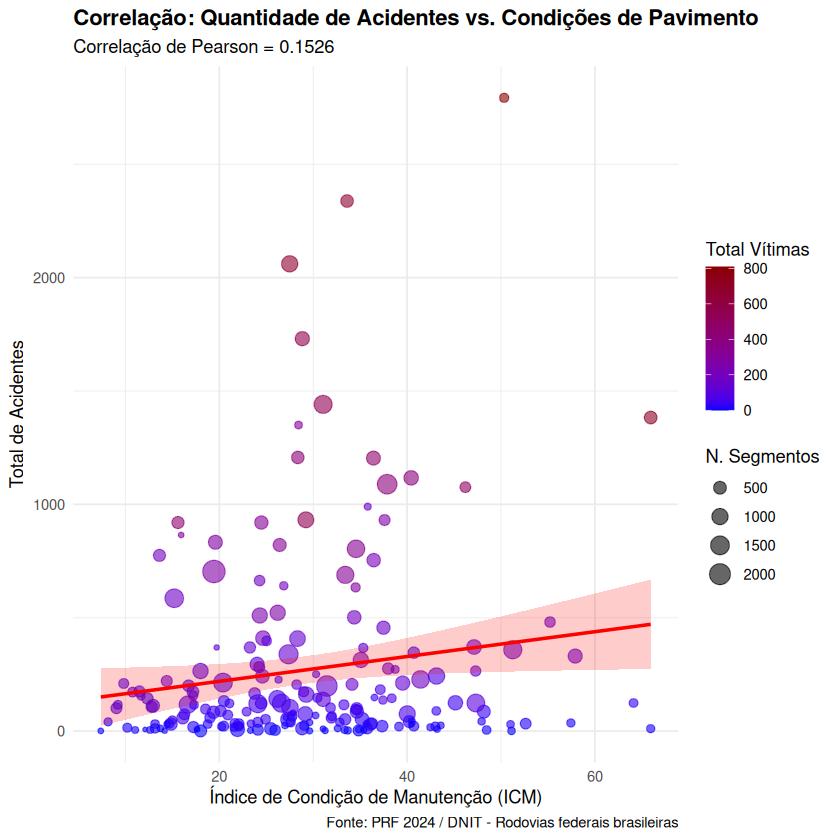

`geom_smooth()` using formula = 'y ~ x'


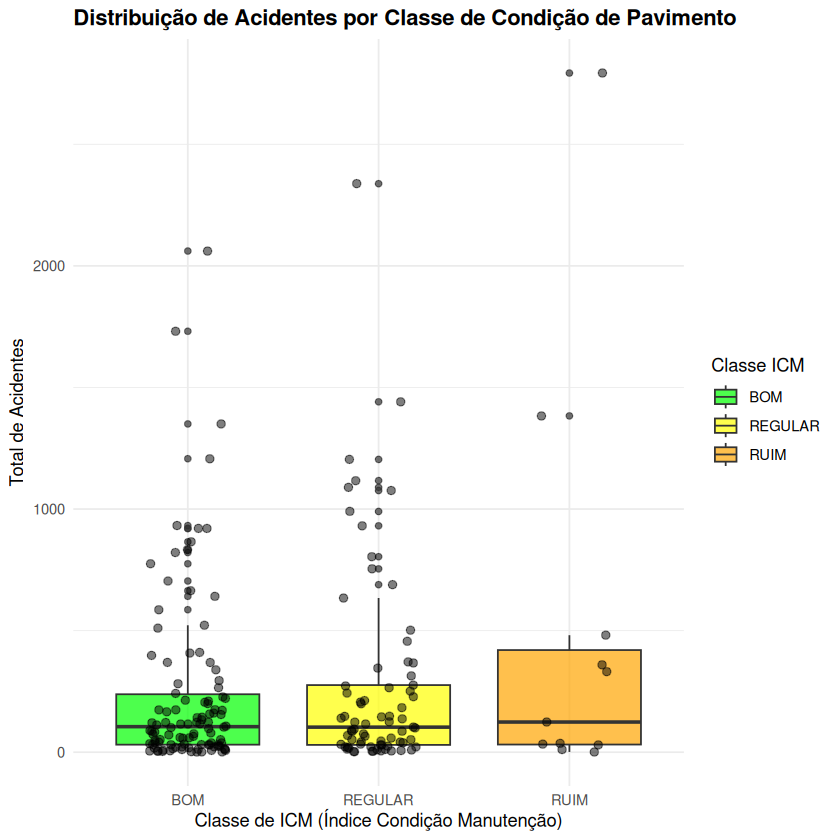


================== RODOVIAS COM MAIOR RISCO ==================

Top 10 Rodovias com Mais Acidentes:
# A tibble: 10 × 7
   Rodovia uf    Total_Acidentes Mortos Feridos_Graves Media_ICM Classe_ICM
     <int> <chr>           <int>  <int>          <int>     <dbl> <chr>     
 1     381 MG               2793    169            640      50.3 RUIM      
 2     101 RJ               2338    136            528      33.6 REGULAR   
 3     277 PR               2061    164            498      27.5 BOM       
 4     376 PR               1731    126            435      28.8 BOM       
 5     282 SC               1441    122            420      31.1 REGULAR   
 6     116 MG               1383    190            524      65.9 RUIM      
 7     116 RS               1350     47            270      28.4 BOM       
 8     101 PE               1207     67            370      28.4 BOM       
 9     230 PB               1204     72            398      36.4 REGULAR   
10     470 SC               1117     70     

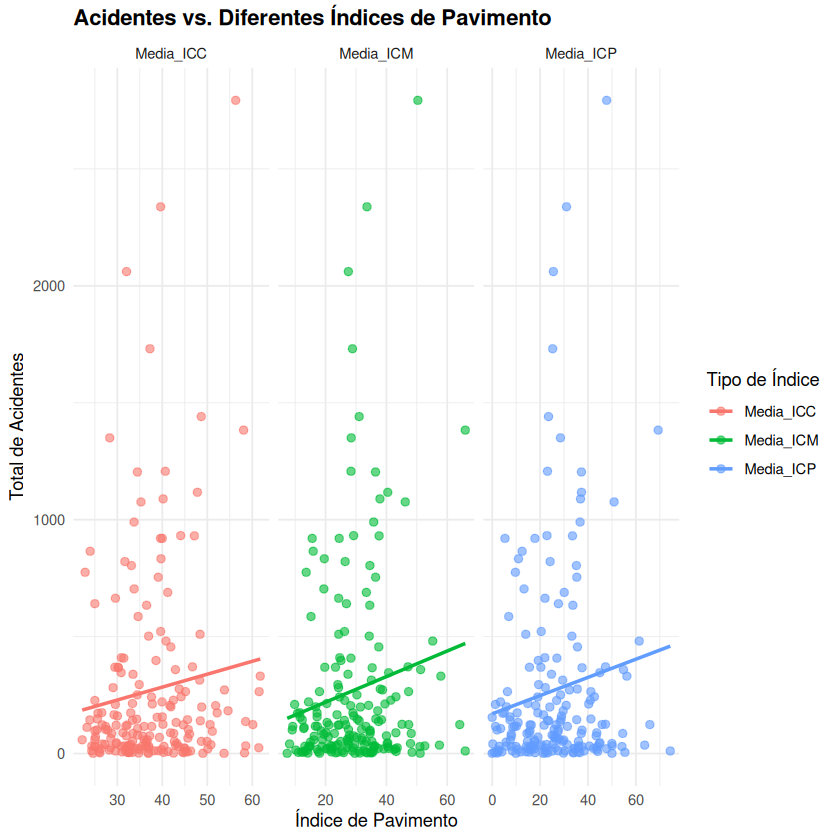

In [16]:
# Crie um código R e busque uma correlação entre quantidade de acidentes e condições de pavimento nas rodovias brasileiras utilizando as bases de dados fornecidas.
################################################################################
#  ANÁLISE DE CORRELAÇÃO: ACIDENTES vs. CONDIÇÕES DE PAVIMENTO                #
#          Rodovias Federais Brasileiras - 2024                               #
################################################################################

# Carregar bibliotecas necessárias
library(tidyverse)
library(ggplot2)

# Carregar as bases de dados
load("Trabalho/bases-de-dados/acidentes/datatran2024.RData")
# df_acidentes_prf é o nome do data frame carregado
load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata")
# df_pavimento_unificado é o nome do data frame carregado
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")
# df_snv é o nome do data frame carregado
load("Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData")
# df_trafego é o nome do data frame carregado

################################################################################
# ETAPA 1: PREPARAR DADOS DE ACIDENTES POR RODOVIA                            #
################################################################################

df_acidentes_por_rodovia <- df_acidentes_prf %>%
  group_by(br, uf) %>%
  summarise(
    Total_Acidentes = n(),
    Mortos = sum(mortos, na.rm = TRUE),
    Feridos_Graves = sum(feridos_graves, na.rm = TRUE),
    Total_Vítimas = sum(mortos, feridos_graves, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  rename(Rodovia = br)

cat("Resumo de Acidentes por Rodovia:\n")
print(head(df_acidentes_por_rodovia, 10))

################################################################################
# ETAPA 2: PREPARAR DADOS DE CONDIÇÕES DE PAVIMENTO POR RODOVIA               #
################################################################################

# Extrair número da rodovia a partir da coluna "Rodovia" (formato BR-XXX)
df_condicoes_resumo <- df_pavimento_unificado %>%
  mutate(
    # Extrair número da rodovia (ex: "BR-101" -> 101)
    Rodovia = as.integer(gsub("BR-|BR ", "", Rodovia))
  ) %>%
  group_by(Rodovia, UF) %>%
  summarise(
    Media_ICC = mean(ICC, na.rm = TRUE),      # Índice de Conservação
    Media_ICP = mean(ICP, na.rm = TRUE),      # Índice de Pavimento
    Media_ICM = mean(ICM, na.rm = TRUE),      # Índice de Manutenção
    N_Segmentos = n(),
    .groups = "drop"
  ) %>%
  rename(uf = UF)

cat("\nResumo de Condições de Pavimento por Rodovia:\n")
print(head(df_condicoes_resumo, 10))

################################################################################
# ETAPA 3: UNIR DATASETS POR RODOVIA E ESTADO                                 #
################################################################################

df_correlacao <- df_acidentes_por_rodovia %>%
  inner_join(
    df_condicoes_resumo,
    by = c("Rodovia" = "Rodovia", "uf" = "uf")
  ) %>%
  # Remover linhas com valores faltantes nos índices críticos
  filter(!is.na(Media_ICM) & !is.na(Total_Acidentes))

cat("\nDimensões da análise:\n")
cat("Rodovias analisadas:", nrow(df_correlacao), "\n")
cat("Total de acidentes na amostra:", sum(df_correlacao$Total_Acidentes), "\n\n")

# Amostra dos dados integrados
print(head(df_correlacao, 10))

################################################################################
# ETAPA 4: CALCULAR CORRELAÇÕES                                               #
################################################################################

cat("\n================== MATRIZ DE CORRELAÇÕES ==================\n\n")

# Correlação: Acidentes vs. ICM (Índice de Condição de Manutenção)
cor_acidentes_icm <- cor(
  df_correlacao$Total_Acidentes, 
  df_correlacao$Media_ICM, 
  use = "complete.obs"
)

# Correlação: Vítimas vs. ICM
cor_vitimas_icm <- cor(
  df_correlacao$Total_Vítimas, 
  df_correlacao$Media_ICM, 
  use = "complete.obs"
)

# Correlação: Acidentes vs. ICP
cor_acidentes_icp <- cor(
  df_correlacao$Total_Acidentes, 
  df_correlacao$Media_ICP, 
  use = "complete.obs"
)

# Correlação: Acidentes vs. ICC
cor_acidentes_icc <- cor(
  df_correlacao$Total_Acidentes, 
  df_correlacao$Media_ICC, 
  use = "complete.obs"
)

cat("Correlação: Total Acidentes vs. ICM (Índice Manutenção):", 
    round(cor_acidentes_icm, 4), "\n")
cat("Correlação: Total Vítimas vs. ICM:", 
    round(cor_vitimas_icm, 4), "\n")
cat("Correlação: Total Acidentes vs. ICP (Índice Pavimento):", 
    round(cor_acidentes_icp, 4), "\n")
cat("Correlação: Total Acidentes vs. ICC (Índice Conservação):", 
    round(cor_acidentes_icc, 4), "\n\n")

################################################################################
# ETAPA 5: ANÁLISE DESCRITIVA POR CLASSE DE ICM                               #
################################################################################

cat("================== ANÁLISE POR CLASSE DE ICM ==================\n\n")

df_correlacao_classified <- df_correlacao %>%
  mutate(
    Classe_ICM = case_when(
      Media_ICM < 30 ~ "BOM",
      Media_ICM < 50 ~ "REGULAR",
      Media_ICM < 70 ~ "RUIM",
      Media_ICM >= 70 ~ "PÉSSIMO",
      TRUE ~ NA_character_
    )
  )

resumo_por_classe <- df_correlacao_classified %>%
  group_by(Classe_ICM) %>%
  summarise(
    Rodovias = n(),
    Acidentes_Total = sum(Total_Acidentes),
    Acidentes_Media = mean(Total_Acidentes),
    Mortos_Total = sum(Mortos),
    Feridos_Graves_Total = sum(Feridos_Graves),
    ICM_Media = mean(Media_ICM),
    .groups = "drop"
  ) %>%
  arrange(factor(Classe_ICM, levels = c("BOM", "REGULAR", "RUIM", "PÉSSIMO")))

print(resumo_por_classe)

################################################################################
# ETAPA 6: VISUALIZAÇÕES COM GGPLOT2                                          #
################################################################################

# Gráfico 1: Scatter plot com linha de tendência (Acidentes vs. ICM)
plot1 <- ggplot(df_correlacao, aes(x = Media_ICM, y = Total_Acidentes)) +
  geom_point(aes(size = N_Segmentos, color = Total_Vítimas), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "red", fill = "red", alpha = 0.2) +
  scale_size_continuous(name = "N. Segmentos") +
  scale_color_gradient(name = "Total Vítimas", low = "blue", high = "darkred") +
  labs(
    title = "Correlação: Quantidade de Acidentes vs. Condições de Pavimento",
    subtitle = paste("Correlação de Pearson =", round(cor_acidentes_icm, 4)),
    x = "Índice de Condição de Manutenção (ICM)",
    y = "Total de Acidentes",
    caption = "Fonte: PRF 2024 / DNIT - Rodovias federais brasileiras"
  ) +
  theme_minimal() +
  theme(legend.position = "right", plot.title = element_text(face = "bold"))

print(plot1)

# Gráfico 2: Boxplot por classe de ICM
plot2 <- ggplot(df_correlacao_classified, aes(x = Classe_ICM, y = Total_Acidentes)) +
  geom_boxplot(aes(fill = Classe_ICM), alpha = 0.7) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 2) +
  scale_fill_manual(
    values = c("BOM" = "green", "REGULAR" = "yellow", "RUIM" = "orange", "PÉSSIMO" = "red")
  ) +
  labs(
    title = "Distribuição de Acidentes por Classe de Condição de Pavimento",
    x = "Classe de ICM (Índice Condição Manutenção)",
    y = "Total de Acidentes",
    fill = "Classe ICM"
  ) +
  theme_minimal() +
  theme(legend.position = "right", plot.title = element_text(face = "bold"))

print(plot2)

# Gráfico 3: Comparação entre indicadores (Acidentes vs. ICP, ICC, ICM)
df_comparacao <- df_correlacao %>%
  select(Rodovia, uf, Total_Acidentes, Media_ICC, Media_ICP, Media_ICM) %>%
  pivot_longer(
    cols = starts_with("Media_"),
    names_to = "Indice",
    values_to = "Valor"
  )

plot3 <- ggplot(df_comparacao, aes(x = Valor, y = Total_Acidentes, color = Indice)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, alpha = 0.3) +
  facet_wrap(~Indice, scales = "free_x") +
  labs(
    title = "Acidentes vs. Diferentes Índices de Pavimento",
    x = "Índice de Pavimento",
    y = "Total de Acidentes",
    color = "Tipo de Índice"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold"))

print(plot3)

################################################################################
# ETAPA 7: RODOVIAS COM MAIOR RISCO                                           #
################################################################################

cat("\n================== RODOVIAS COM MAIOR RISCO ==================\n\n")

rodovias_criticas <- df_correlacao_classified %>%
  arrange(desc(Total_Acidentes)) %>%
  select(Rodovia, uf, Total_Acidentes, Mortos, Feridos_Graves, Media_ICM, Classe_ICM) %>%
  head(10)

cat("Top 10 Rodovias com Mais Acidentes:\n")
print(rodovias_criticas)

################################################################################
# ETAPA 8: SUMÁRIO FINAL                                                      #
################################################################################

cat("\n================== SUMÁRIO DA ANÁLISE ==================\n\n")
cat("Interpretação das Correlações:\n\n")
cat("• Correlação Positiva (>0): Pavimento mais degradado → Mais acidentes\n")
cat("• Correlação Negativa (<0): Pavimento melhor → Menos acidentes\n\n")

if(cor_acidentes_icm > 0.5) {
  interpretacao <- "FORTE e POSITIVA"
} else if(cor_acidentes_icm > 0.3) {
  interpretacao <- "MODERADA e POSITIVA"
} else if(cor_acidentes_icm > 0) {
  interpretacao <- "FRACA e POSITIVA"
} else {
  interpretacao <- "FRACA/NENHUMA ou NEGATIVA"
}

cat("Resultado Principal:\n")
cat("A correlação entre acidentes e condições de pavimento é", interpretacao, "\n")
cat("(Pearson r =", round(cor_acidentes_icm, 4), ")\n\n")

cat("Conclusões:\n")
cat("✓ Rodovias com ICM < 30 (BOM):", 
    round(mean(resumo_por_classe$Acidentes_Media[resumo_por_classe$Classe_ICM == "BOM"]), 2),
    "acidentes/rodovia em média\n")
cat("✓ Rodovias com ICM ≥ 70 (PÉSSIMO):",
    ifelse(any(resumo_por_classe$Classe_ICM == "PÉSSIMO"),
           round(mean(resumo_por_classe$Acidentes_Media[resumo_por_classe$Classe_ICM == "PÉSSIMO"]), 2),
           "Nenhuma rodovia nesta classe"),
    "acidentes/rodovia em média\n")